_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [5]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

# .T transposes your matrix

In [8]:
table2.head().T

,treatmenta,treatmentb
John Smith,NaN,2.0
Jane Doe,16.0,11.0
Mary Johnson,3.0,1.0


In [9]:
table1.describe().T

,count,mean,std,min,25%,50%,75%,max
treatmenta,2.0,9.500000,9.192388,3.0,6.25,9.5,12.75,16.0
treatmentb,3.0,4.666667,5.507571,1.0,1.50,2.0,6.50,11.0


"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [4]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [6]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [11]:
table1.columns

Index(['treatmenta', 'treatmentb'], dtype='object')

In [12]:
table1.index

Index(['John Smith', 'Jane Doe', 'Mary Johnson'], dtype='object')

In [13]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [15]:
table1.reset_index()

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [17]:
table1.reset_index().melt()

,variable,value
0,index,John Smith
1,index,Jane Doe
2,index,Mary Johnson
3,treatmenta,NaN
4,treatmenta,16
5,treatmenta,3
6,treatmentb,2
7,treatmentb,11
8,treatmentb,1


In [18]:
table1.reset_index().melt(id_vars='index')

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [25]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy ['trt']= tidy['trt'].str.replace('treatment','')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [26]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy ['trt']= tidy['trt'].str.replace('treatment','')

tidy.set_index('name')

,trt,result
name,,
John Smith,a,NaN
Jane Doe,a,16.0
Mary Johnson,a,3.0
John Smith,b,2.0
Jane Doe,b,11.0
Mary Johnson,b,1.0


Extra Challenge

What if we wanted to change 'a' and 'b' to 0 and 1?

In [27]:
tidy['trt'].replace('a',0).replace('b',1)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [28]:
tidy['trt'].map({'a':0, 'b':1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [29]:
tidy['trt'].map({'a':0})

0    0.0
1    0.0
2    0.0
3    NaN
4    NaN
5    NaN
Name: trt, dtype: float64

In [30]:
tidy['trt'] == 'b'

0    False
1    False
2    False
3     True
4     True
5     True
Name: trt, dtype: bool

In [31]:
(tidy['trt'] == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [32]:
tidy['trt'].apply(lambda x: ord(x) - ord('a'))

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [33]:
tidy['trt'].apply(lambda x: ord(x))

0    97
1    97
2    97
3    98
4    98
5    98
Name: trt, dtype: int64

## Table 2 --> Tidy

In [94]:
table2.describe()

,John Smith,Jane Doe,Mary Johnson
count,1.0,2.000000,2.000000
mean,2.0,13.500000,2.000000
std,NaN,3.535534,1.414214
min,2.0,11.000000,1.000000
25%,2.0,12.250000,1.500000
50%,2.0,13.500000,2.000000
75%,2.0,14.750000,2.500000
max,2.0,16.000000,3.000000


In [97]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [93]:
table2.columns

Index(['John Smith', 'Jane Doe', 'Mary Johnson'], dtype='object')

In [89]:
table2.index

Index(['treatmenta', 'treatmentb'], dtype='object')

In [90]:
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [91]:
table2.reset_index()

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [92]:
table2.reset_index().melt()

,variable,value
0,index,treatmenta
1,index,treatmentb
2,John Smith,NaN
3,John Smith,2
4,Jane Doe,16
5,Jane Doe,11
6,Mary Johnson,3
7,Mary Johnson,1


In [0]:
tidy2 = table2.reset_index().melt(id_vars='index')

In [103]:
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
tidy2 = tidy2.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})

In [105]:
tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
tidy2 ['trt']= tidy2['trt'].str.replace('treatment','')

In [107]:
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [34]:
table1


,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [35]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [36]:
tidy.pivot_table(index='name', columns='trt', values='result')

#pd.pivot_table() exists too





trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


**Extra Seaborn Example**

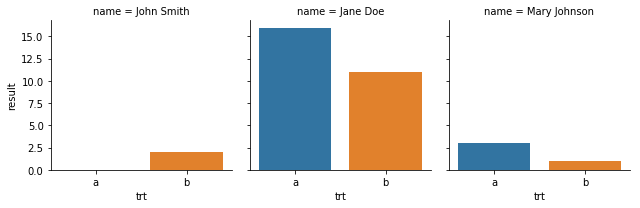

In [50]:
sns.catplot(x='trt', y='result', col='name',
           kind='bar', data=tidy, height=3)

## Tidy --> Table 2

In [98]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [108]:
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


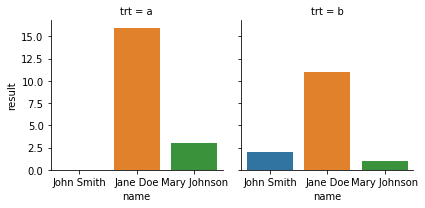

In [141]:
tidy2.pivot_table(index='trt', columns='name', values='result')


sns.catplot(x='name', y='result', col='trt',
           kind='bar', data=tidy2, height=3)


## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [39]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-27 17:02:24--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.189
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  41.7MB/s    in 5.1s    

2019-03-27 17:02:29 (38.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [40]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [41]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

aisles = pd.read_csv('aisles.csv')

dept = pd.read_csv('departments.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [51]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [53]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [54]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [55]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [0]:
merged = (products[['product_id','product_name']]
          .merge(order_products[['order_id','product_id']])
          .merge(orders[['order_id','order_hour_of_day']]))

In [58]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (33819106, 4), (3421083, 7), (33819106, 4))

In [59]:
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
#What condition will filter merged to just the 2 product that we care about?

condition = ((merged['product_name']=='Half Baked Frozen Yorgurt') |
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

# to this:

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

In [61]:
merged.shape, subset.shape

((33819106, 4), (5978, 4))

In [62]:
subset.head()

,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [0]:
subset.sample(n=25)

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [67]:
froyo['order_hour_of_day'].value_counts()

15    284
16    275
18    255
17    253
14    252
13    235
11    202
19    198
12    194
10    176
20    147
9     128
8      89
21     86
7      59
22     49
23     36
6      18
0      16
5      10
1       8
2       8
3       3
4       2
Name: order_hour_of_day, dtype: int64

In [68]:
froyo['order_hour_of_day'].value_counts().sort_index()

#sorted by time of day military hours

0      16
1       8
2       8
3       3
4       2
5      10
6      18
7      59
8      89
9     128
10    176
11    202
12    194
13    235
14    252
15    284
16    275
17    253
18    255
19    198
20    147
21     86
22     49
23     36
Name: order_hour_of_day, dtype: int64

In [69]:
froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.005364
1     0.002682
2     0.002682
3     0.001006
4     0.000670
5     0.003352
6     0.006034
7     0.019779
8     0.029836
9     0.042910
10    0.059001
11    0.067717
12    0.065035
13    0.078780
14    0.084479
15    0.095206
16    0.092189
17    0.084814
18    0.085484
19    0.066376
20    0.049279
21    0.028830
22    0.016426
23    0.012068
Name: order_hour_of_day, dtype: float64

In [70]:
froyo['order_hour_of_day'].value_counts(normalize=True).sort_index() * 100

0     0.536373
1     0.268186
2     0.268186
3     0.100570
4     0.067047
5     0.335233
6     0.603419
7     1.977875
8     2.983574
9     4.290982
10    5.900101
11    6.771706
12    6.503520
13    7.877975
14    8.447871
15    9.520617
16    9.218907
17    8.481395
18    8.548441
19    6.637613
20    4.927925
21    2.883004
22    1.642642
23    1.206839
Name: order_hour_of_day, dtype: float64

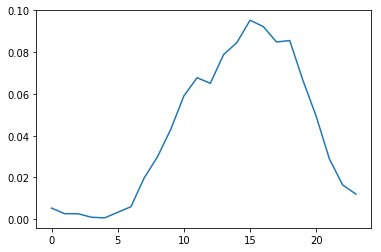

In [71]:
froyo['order_hour_of_day'].value_counts(normalize=True).sort_index().plot()

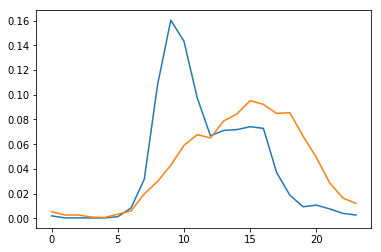

In [72]:
(cream['order_hour_of_day'].value_counts(normalize=True)
  .sort_index()
  .plot())

(froyo['order_hour_of_day'].value_counts(normalize=True)
  .sort_index()
  .plot())

### 2. crosstab

In [0]:
pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns')

#raw counts occur if normalize code is not added

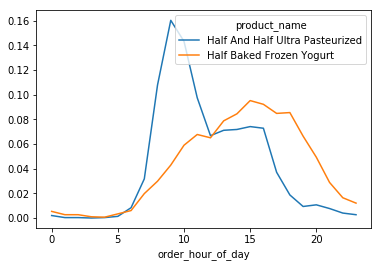

In [74]:
pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns').plot()

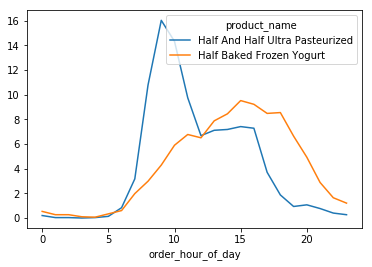

In [75]:
(pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns') * 100).plot()

### 3. pivot_table

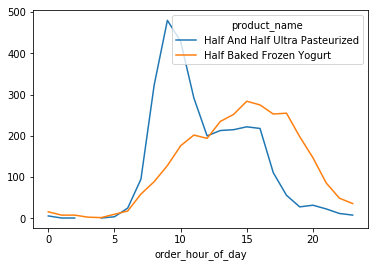

In [76]:
subset.pivot_table(index='order_hour_of_day',
                  columns = 'product_name',
                  values='order_id',
                  aggfunc=len).plot();

### 4. melt

In [0]:
table = pd.crosstab(subset['order_hour_of_day'],
                     subset['product_name'],
                     normalize=True)
                  
table.reset_index().melt(id_vars='order_hour_of_day')

In [0]:
table = pd.crosstab(subset['order_hour_of_day'],
                     subset['product_name'],
                     normalize=True)
                  
(table
 .reset_index()
 .melt(id_vars='order_hour_of_day')
 .rename(columns={
     'order_hour_of_day': 'Hour Of Day Ordered',
     'product_name': 'Product',
     'value': 'Percent of Orders by Product'
 }))

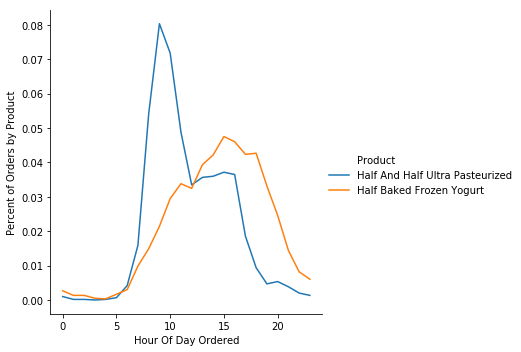

In [86]:
table = pd.crosstab(subset['order_hour_of_day'],
                     subset['product_name'],
                     normalize=True)
                  
melted = (table
 .reset_index()
 .melt(id_vars='order_hour_of_day')
 .rename(columns={
     'order_hour_of_day': 'Hour Of Day Ordered',
     'product_name': 'Product',
     'value': 'Percent of Orders by Product'
 }))

sns.relplot(x='Hour Of Day Ordered',
           y='Percent of Orders by Product',
           hue = 'Product',
           data=melted,
           kind='line');

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [113]:
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [114]:
flights.index

RangeIndex(start=0, stop=144, step=1)

In [115]:
flights.columns.tolist()

['year', 'month', 'passengers']

In [120]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [121]:
flights.shape

(144, 3)

In [122]:
flights.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [0]:
flights.isnull()

In [126]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [130]:
flights.columns.tolist()

['year', 'month', 'passengers']

In [0]:
flights.set_index(["year"], inplace = True,
                 append = True, drop = True)

In [0]:
flights.reset_index(inplace=True)

In [0]:
flights

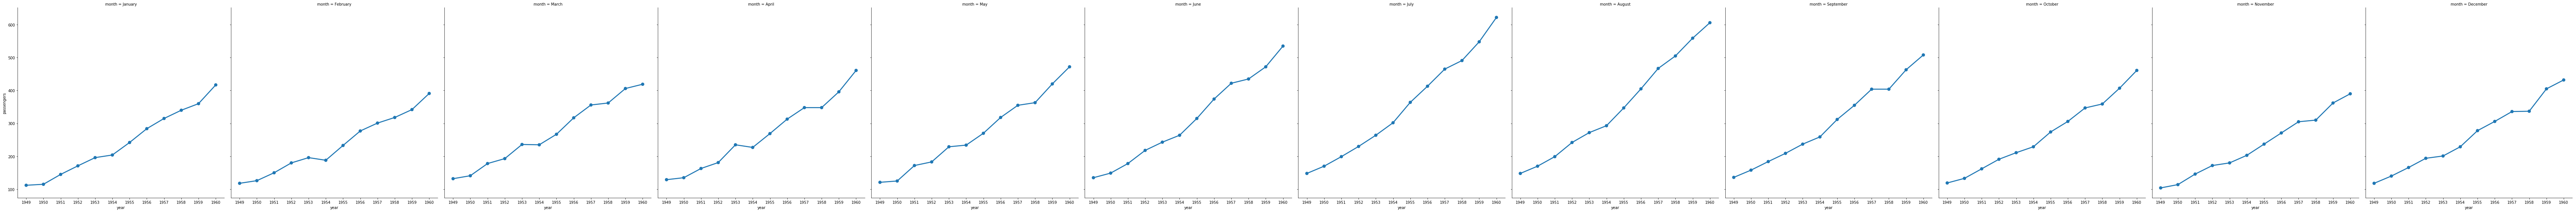

In [157]:
flights.pivot_table(index ='year', columns = 'month', values = 'passengers')

sns.catplot(x='year', y='passengers',col = 'month',
           kind='point', data=flights, height=8)

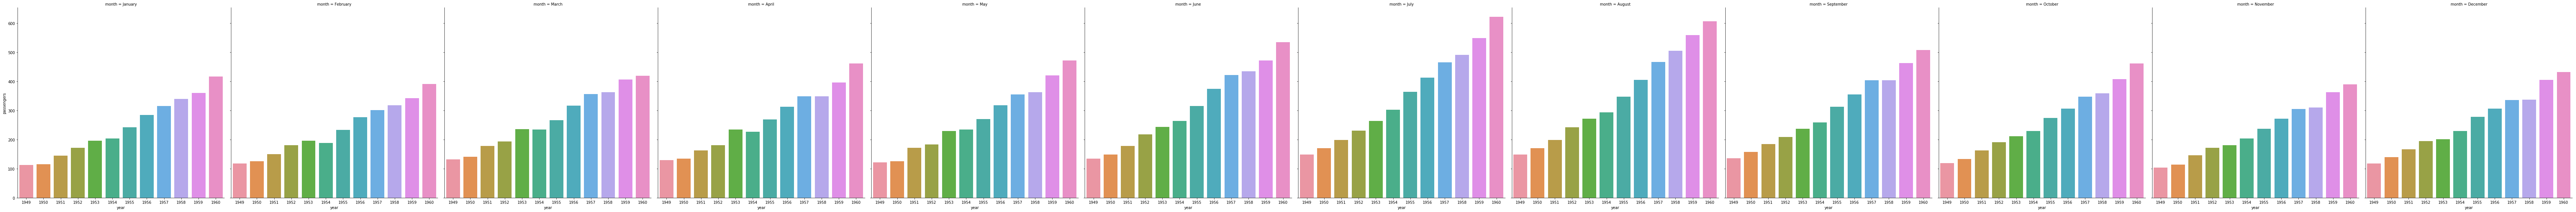

In [158]:
flights.pivot_table(index ='year', columns = 'month', values = 'passengers')

sns.catplot(x='year', y='passengers',col = 'month',
           kind='bar', data=flights, height=8)

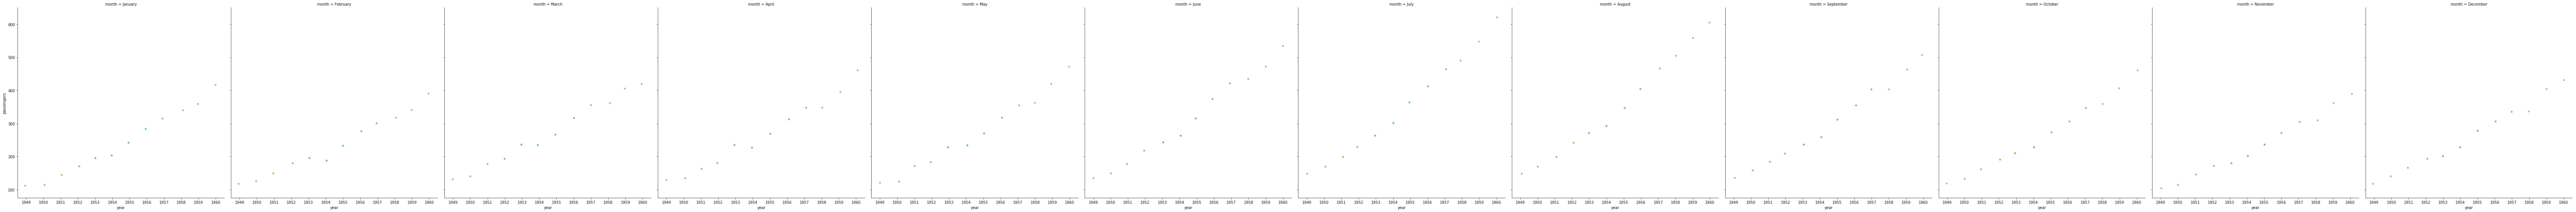

In [159]:
flights.pivot_table(index ='year', columns = 'month', values = 'passengers')

sns.catplot(x='year', y='passengers',col = 'month',
           kind='strip', data=flights, height=8)

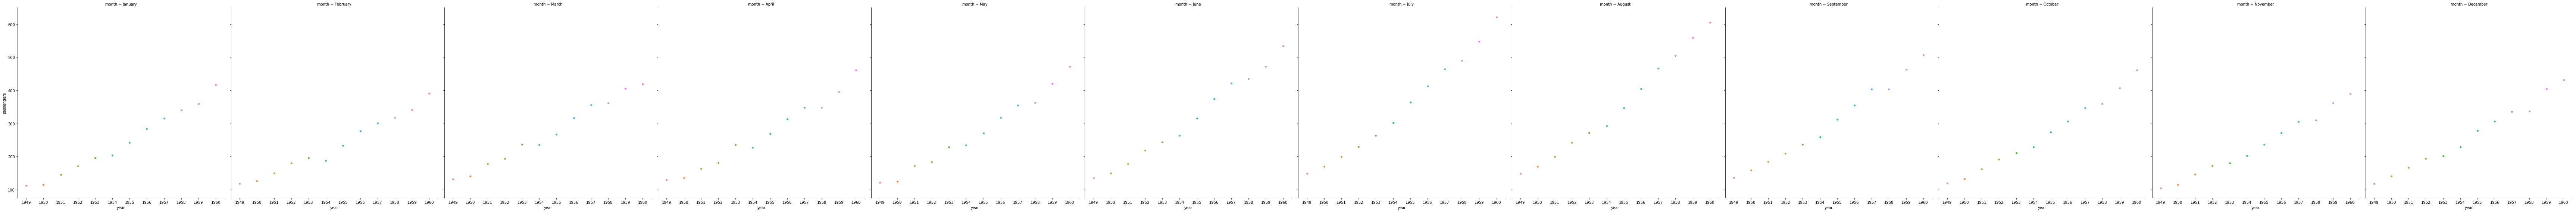

In [160]:
flights.pivot_table(index ='year', columns = 'month', values = 'passengers')

sns.catplot(x='year', y='passengers',col = 'month',
           kind='swarm', data=flights, height=8)

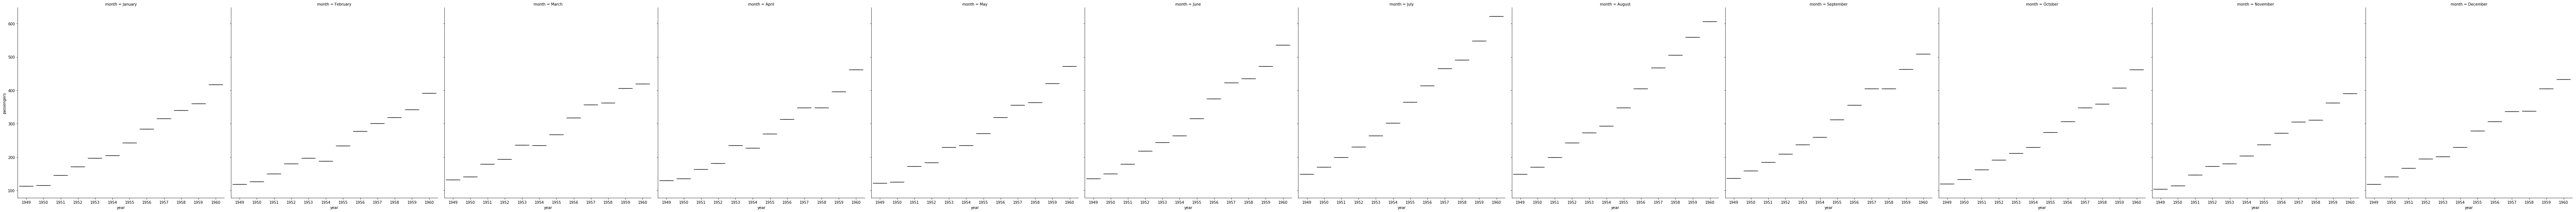

In [161]:
flights.pivot_table(index ='year', columns = 'month', values = 'passengers')

sns.catplot(x='year', y='passengers',col = 'month',
           kind='box', data=flights, height=8)

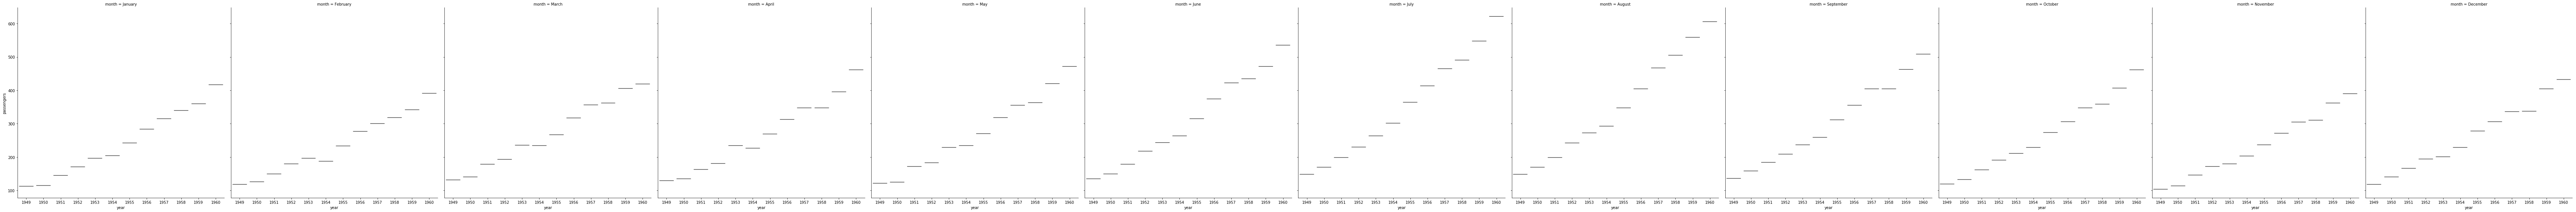

In [162]:
flights.pivot_table(index ='year', columns = 'month', values = 'passengers')

sns.catplot(x='year', y='passengers',col = 'month',
           kind='violin', data=flights, height=8)

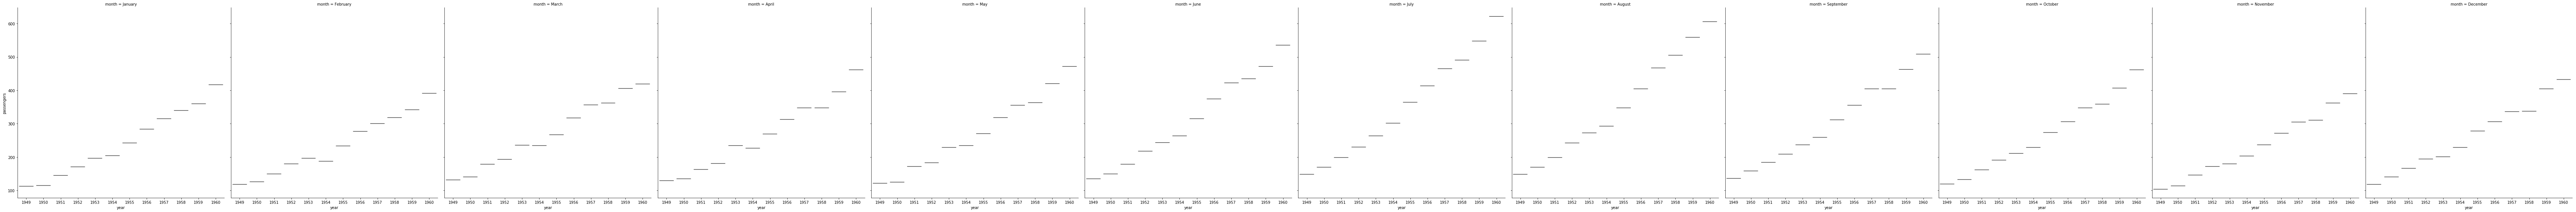

In [163]:
flights.pivot_table(index ='year', columns = 'month', values = 'passengers')

sns.catplot(x='year', y='passengers',col = 'month',
           kind='boxen', data=flights, height=8)

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [166]:
aisles.columns.tolist()

['aisle_id', 'aisle']

In [167]:
dept.columns.tolist()

['department_id', 'department']

In [168]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [169]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
sales = pd.merge(order_products[['order_id', 'product_id']], 
              products[['product_id', 'product_name']])

In [173]:
product_sales = sales.product_name.value_counts()

product_sales.head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [175]:
product_sales.describe()

count     49685.000000
mean        680.670343
std        4987.769425
min           1.000000
25%          18.000000
50%          63.000000
75%         272.000000
max      491291.000000
Name: product_name, dtype: float64